In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
proj_dir = Path("../../../")

In [3]:
mcnary_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_MCN.csv")
priest_rapids_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_PRD.csv")
prosser_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_PRO.csv")
ice_harbor_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_IHR.csv")

mcnary_df["date"] = pd.to_datetime(mcnary_df["date"])
priest_rapids_df["date"] = pd.to_datetime(priest_rapids_df["date"])
prosser_df["date"] = pd.to_datetime(prosser_df["date"])
ice_harbor_df["date"] = pd.to_datetime(ice_harbor_df["date"])

# resample to daily
mcnary_df = mcnary_df.resample("D", on="date").mean().reset_index()
priest_rapids_df = priest_rapids_df.resample("D", on="date").mean().reset_index()
prosser_df = prosser_df.resample("D", on="date").mean().reset_index()
ice_harbor_df = ice_harbor_df.resample("D", on="date").mean().reset_index()



In [4]:
def annual_cumulative(df):
    df["year"] = df['date'].dt.year
    df['day_of_year'] = df['date'].dt.dayofyear

    grouped = df.groupby(["year"])
    
    for year, group in grouped:
        group = group.fillna(0)
        df.loc[group.index, "cumulative"] = group["chinook"].cumsum()

    return df


/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_19578/5755594.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group in grouped:


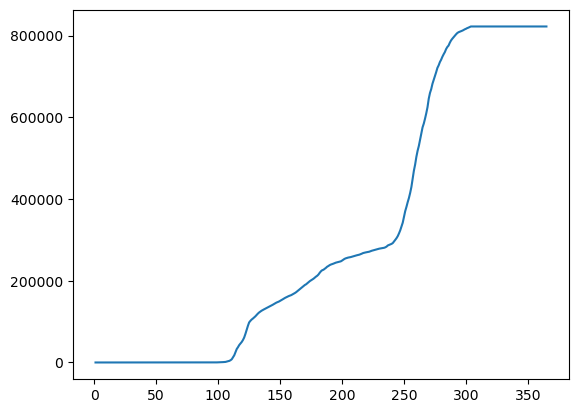

In [5]:

mcnary_df2 = annual_cumulative(mcnary_df.fillna(0))
mcnary_df2.reset_index(inplace=True)

# plot 2015
mcnary_df2_2015 = mcnary_df2[mcnary_df2["year"] == 2015].copy()
mcnary_df2_2015["day_of_year"] = mcnary_df2_2015["date"].dt.dayofyear

plt.plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["cumulative"])

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_19578/5755594.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group in grouped:


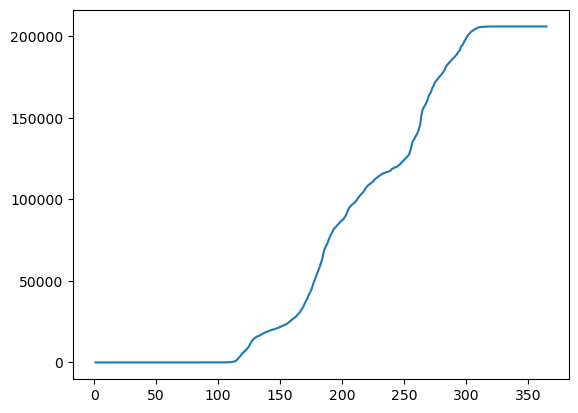

In [6]:

priest_rapids_df2 = annual_cumulative(priest_rapids_df.fillna(0))
priest_rapids_df2.reset_index(inplace=True)

# plot 2015
priest_rapids_df2_2015 = priest_rapids_df2[priest_rapids_df2["year"] == 2015].copy()
priest_rapids_df2_2015["day_of_year"] = priest_rapids_df2_2015["date"].dt.dayofyear

plt.plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["cumulative"])

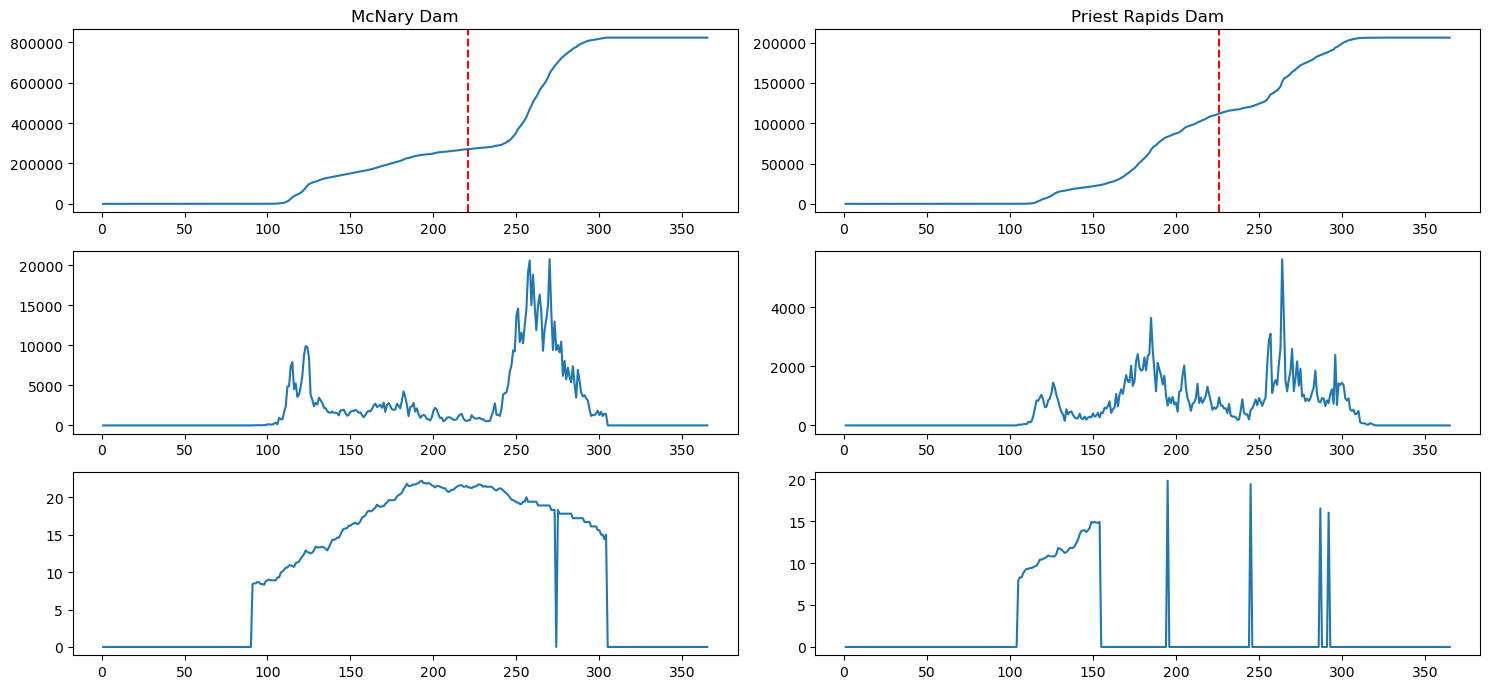

In [31]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7))

axs[0, 0].plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["cumulative"])
axs[0, 0].set_title("McNary Dam")

# ax2 = axs[0, 0].twinx()
axs[0, 1].plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["cumulative"])
# ax2.plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["cumulative"])
axs[0, 1].set_title("Priest Rapids Dam")

axs[1, 0].plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["chinook"])
axs[1, 1].plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["chinook"])

axs[2, 0].plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["avg_temp(C)"])
axs[2, 1].plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["avg_temp(C)"])

axs[0, 0].axvline(x=pd.to_datetime("2015-08-09").dayofyear, color="red", linestyle="--")
axs[0, 1].axvline(x=pd.to_datetime("2015-08-14").dayofyear, color="red", linestyle="--")

fig.tight_layout()

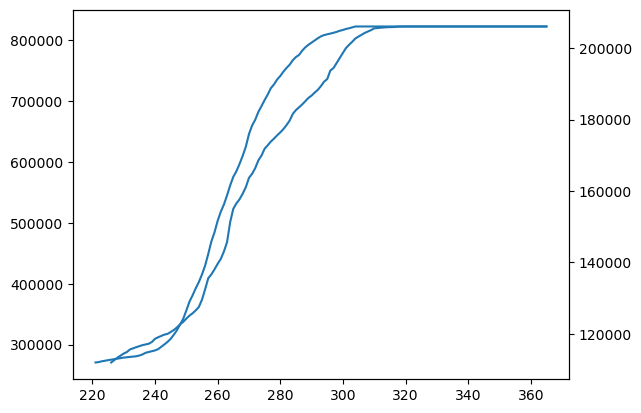

In [36]:
fig, ax = plt.subplots()
ax.plot(
    mcnary_df2_2015[
        mcnary_df2_2015["day_of_year"] >= pd.to_datetime("2015-08-09").dayofyear
    ]["day_of_year"],
    mcnary_df2_2015[
        mcnary_df2_2015["day_of_year"] >= pd.to_datetime("2015-08-09").dayofyear
    ]["cumulative"],
    label="McNary Dam",
)
ax2 = ax.twinx()
ax2.plot(
    priest_rapids_df2_2015[
        priest_rapids_df2_2015["day_of_year"] >= pd.to_datetime("2015-08-14").dayofyear
    ]["day_of_year"],
    priest_rapids_df2_2015[
        priest_rapids_df2_2015["day_of_year"] >= pd.to_datetime("2015-08-14").dayofyear
    ]["cumulative"],
    label="Priest Rapids Dam",
)

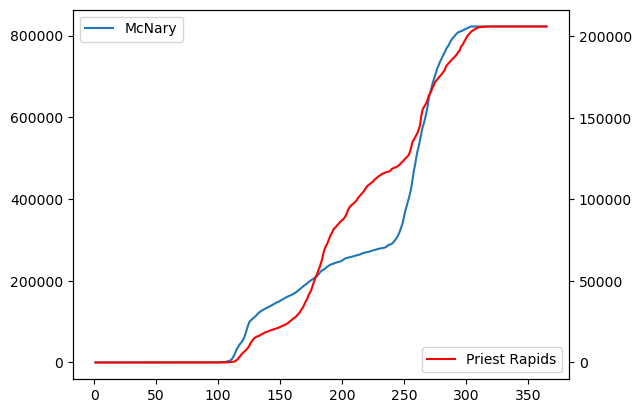

In [26]:
fig, ax = plt.subplots()

ax.plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["cumulative"], label="McNary")
ax2= ax.twinx()
ax2.plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["cumulative"], label="Priest Rapids", color="red")

# legend
ax.legend(loc="upper left")
ax2.legend(loc="lower right")

In [29]:
mcnary_df2_2015['percent_cumulative'] = mcnary_df2_2015['cumulative'] / mcnary_df2_2015['cumulative'].max()
priest_rapids_df2_2015['percent_cumulative'] = priest_rapids_df2_2015['cumulative'] / priest_rapids_df2_2015['cumulative'].max()

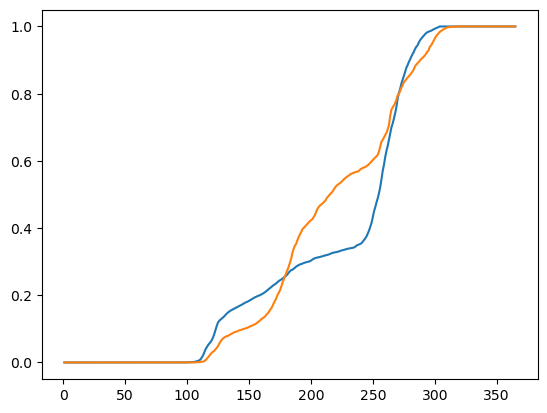

In [30]:
fig, ax = plt.subplots()

ax.plot(mcnary_df2_2015["day_of_year"], mcnary_df2_2015["percent_cumulative"], label="McNary")
ax.plot(priest_rapids_df2_2015["day_of_year"], priest_rapids_df2_2015["percent_cumulative"], label="Priest Rapids")

In [39]:
mcnary_df2_2015[mcnary_df2_2015['percent_cumulative']>=.05]

,date,bull_trout,chum,lamprey,pink,chinook,avg_temp(C),steelhead,coho,sockeye,shad,year,month,day,cumulative,day_of_year,percent_cumulative
5870,2015-04-27,0.0,0.0,0.0,0.0,5238.0,11.2,18.0,0.0,0.0,0.0,2015,4,27,42665.0,117,0.051871
5871,2015-04-28,0.0,0.0,0.0,0.0,3573.0,11.3,8.0,0.0,0.0,0.0,2015,4,28,46238.0,118,0.056215
5872,2015-04-29,0.0,0.0,0.0,0.0,3849.0,11.4,18.0,0.0,0.0,0.0,2015,4,29,50087.0,119,0.060895
5873,2015-04-30,0.0,0.0,0.0,0.0,4808.0,11.8,10.0,0.0,0.0,0.0,2015,4,30,54895.0,120,0.066740
5874,2015-05-01,0.0,0.0,0.0,0.0,6168.0,12.1,28.0,0.0,0.0,0.0,2015,5,1,61063.0,121,0.074239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,2015-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,27,822516.0,361,1.000000
6115,2015-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,28,822516.0,362,1.000000
6116,2015-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,29,822516.0,363,1.000000
6117,2015-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,30,822516.0,364,1.000000


In [40]:
priest_rapids_df2_2015[priest_rapids_df2_2015['percent_cumulative']>=.05]

,date,bull_trout,chum,lamprey,chinook,avg_temp(C),steelhead,coho,sockeye,shad,year,month,day,cumulative,day_of_year,percent_cumulative
5969,2015-05-06,0.0,0.0,0.0,1451.0,10.8,0.0,0.0,0.0,0.0,2015,5,6,11536.0,126,0.055972
5970,2015-05-07,0.0,0.0,0.0,1281.0,10.8,2.0,0.0,0.0,0.0,2015,5,7,12817.0,127,0.062187
5971,2015-05-08,0.0,0.0,0.0,1029.0,11.1,0.0,0.0,0.0,0.0,2015,5,8,13846.0,128,0.067180
5972,2015-05-09,0.0,0.0,1.0,848.0,11.8,0.0,0.0,0.0,0.0,2015,5,9,14694.0,129,0.071294
5973,2015-05-10,0.0,0.0,0.0,619.0,11.7,1.0,0.0,0.0,1.0,2015,5,10,15313.0,130,0.074298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,2015-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,27,206103.0,361,1.000000
6205,2015-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,28,206103.0,362,1.000000
6206,2015-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,29,206103.0,363,1.000000
6207,2015-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,12,30,206103.0,364,1.000000


In [48]:
mcnary_df

,bull_trout,chum,lamprey,pink,chinook,avg_temp(C),steelhead,coho,sockeye,shad
date,,,,,,,,,,
1999-04-01,NaN,NaN,NaN,NaN,NaN,6.4,17.0,NaN,NaN,NaN
1999-04-02,NaN,NaN,NaN,NaN,NaN,6.8,17.0,NaN,NaN,NaN
1999-04-03,NaN,NaN,NaN,NaN,1.0,6.9,10.0,NaN,NaN,NaN
1999-04-04,NaN,NaN,NaN,NaN,3.0,7.0,8.0,NaN,NaN,NaN
1999-04-05,NaN,NaN,NaN,NaN,NaN,7.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-24,NaN,NaN,NaN,NaN,248.0,11.1,2.0,NaN,NaN,NaN
2024-04-25,NaN,NaN,NaN,NaN,230.0,11.1,10.0,NaN,NaN,NaN
2024-04-26,NaN,NaN,NaN,NaN,631.0,11.1,10.0,NaN,NaN,NaN


In [27]:
mcnary_2015_fall = mcnary_df[(mcnary_df['date']>='2015-08-01') & (mcnary_df['date']<='2015-11-30')].copy()
priest_rapids_2015_fall = priest_rapids_df[(priest_rapids_df['date']>='2015-08-01') & (priest_rapids_df['date']<='2015-11-30')].copy()

In [28]:
mcnary_2015_fall=annual_cumulative(mcnary_2015_fall)
priest_rapids_2015_fall=annual_cumulative(priest_rapids_2015_fall)

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_19578/5755594.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group in grouped:
/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_19578/5755594.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for year, group in grouped:


In [29]:
mcnary_2015_fall['percent_cumulative'] = mcnary_2015_fall['cumulative'] / mcnary_2015_fall['cumulative'].max()
priest_rapids_2015_fall['percent_cumulative'] = priest_rapids_2015_fall['cumulative'] / priest_rapids_2015_fall['cumulative'].max()

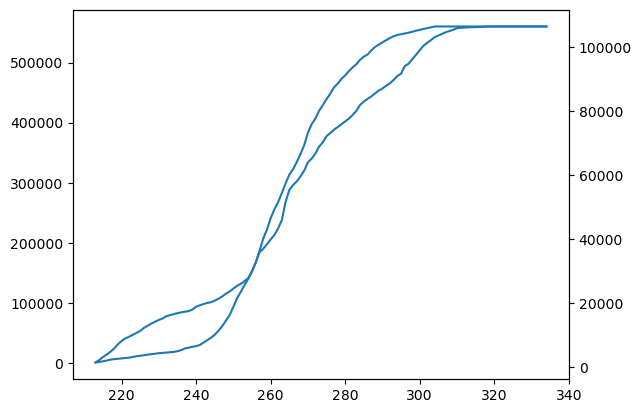

In [30]:
fig, ax = plt.subplots()

ax.plot(mcnary_2015_fall["day_of_year"], mcnary_2015_fall["cumulative"], label="McNary")
ax2= ax.twinx()
ax2.plot(priest_rapids_2015_fall["day_of_year"], priest_rapids_2015_fall["cumulative"], label="Priest Rapids")

In [70]:
priest_rapids_2015_fall['percent_cumulative2'] = priest_rapids_2015_fall['cumulative'] / mcnary_2015_fall['cumulative']

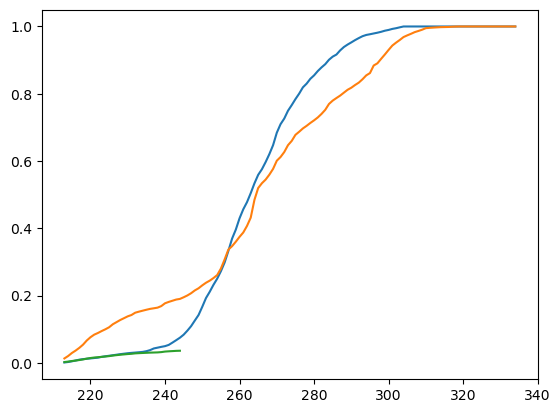

In [71]:
fig, ax = plt.subplots()

ax.plot(mcnary_2015_fall["day_of_year"], mcnary_2015_fall["percent_cumulative"], label="McNary")
ax.plot(priest_rapids_2015_fall["day_of_year"], priest_rapids_2015_fall["percent_cumulative"], label="Priest Rapids")
ax.plot(priest_rapids_2015_fall["day_of_year"], priest_rapids_2015_fall["percent_cumulative2"], label="Priest Rapids")